In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('XN-Project Data.xlsx')

# Convert dates safely
df['Worked Date'] = pd.to_datetime(df['Worked Date'], dayfirst=True, errors='coerce')
df = df.dropna(subset=['Worked Date'])

In [3]:
categorical_cols = ['Customer Name', 'Project', 'Task or Ticket Title', 'Resource Name']
for col in categorical_cols:
    print(f"{col} unique values: {df[col].nunique()}")

Customer Name unique values: 130
Project unique values: 344
Task or Ticket Title unique values: 425
Resource Name unique values: 24


In [4]:
revenue_by_customer = df.groupby('Customer Name')['Extended Price'].sum().sort_values(ascending=False)
print("\nTotal revenue by customer:")
print(revenue_by_customer)


Total revenue by customer:
Customer Name
Pharmacy                666950.00
UniversityHill          528450.63
State Transportation    300406.27
Saanich                 293642.85
WWW                     280383.63
                          ...    
Maple Ridge                406.25
SilverBirch                375.00
IOSecure                   325.00
On Side                    215.00
3601 West                  150.00
Name: Extended Price, Length: 130, dtype: float64


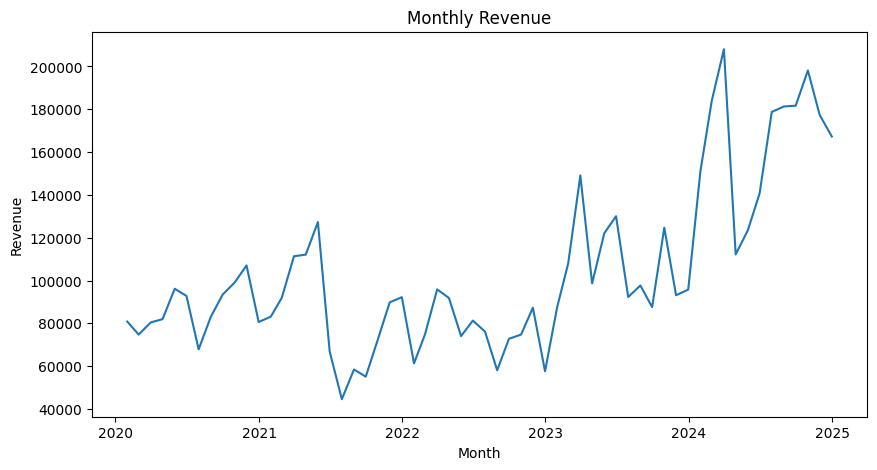

In [5]:
monthly_revenue = df.groupby(pd.Grouper(key='Worked Date', freq='M'))['Extended Price'].sum()

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values)
plt.title('Monthly Revenue')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.show()

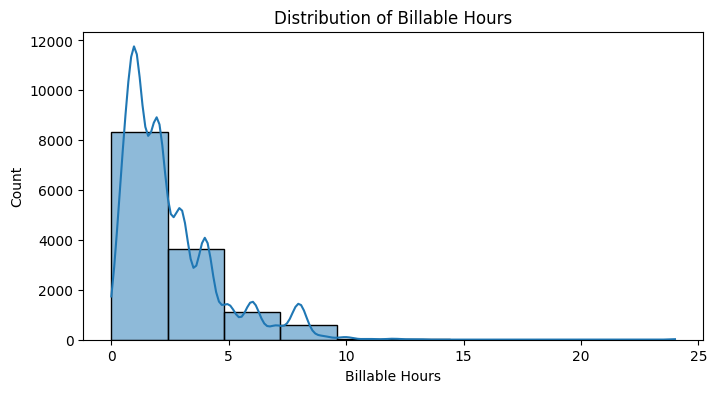

In [6]:
plt.figure(figsize=(8,4))
sns.histplot(df['Billable Hours'], bins=10, kde=True)
plt.title('Distribution of Billable Hours')
plt.xlabel('Billable Hours')
plt.show()

# Daily and Monthly Trends

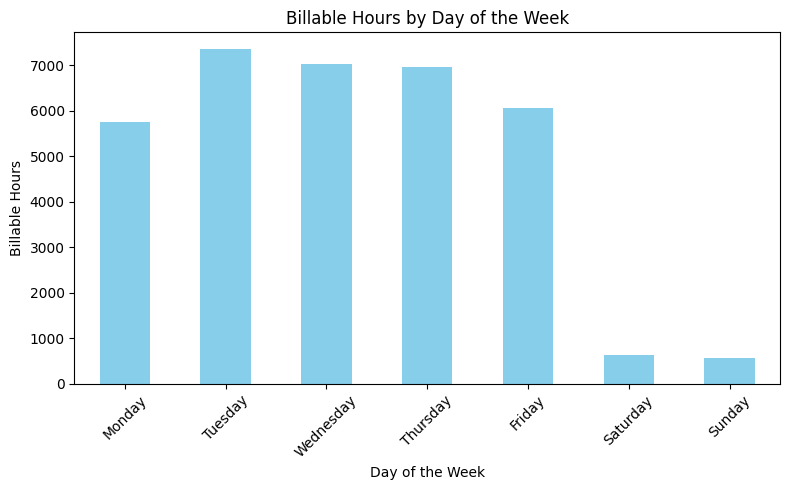

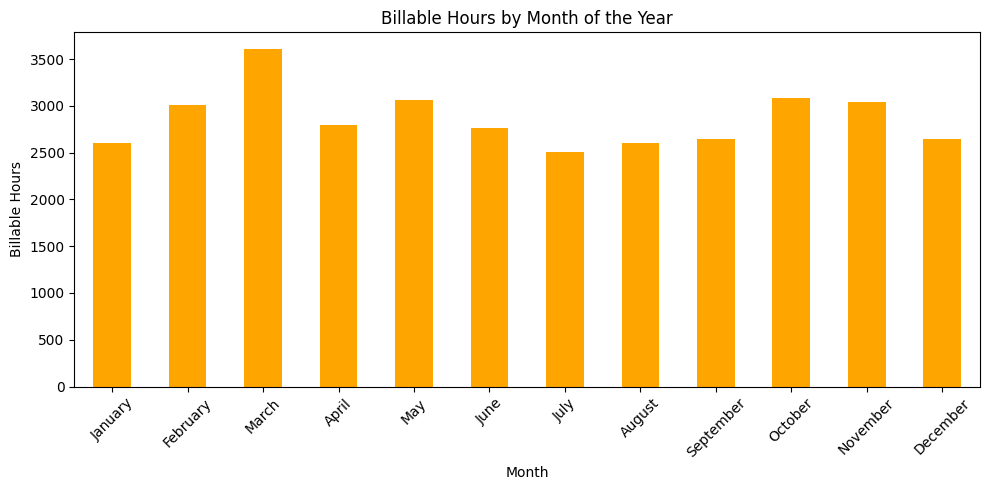

In [7]:
# Day of the Week
df['DayOfWeek'] = df['Worked Date'].dt.day_name()  # Monday, Tuesday, etc.
dow_hours = df.groupby('DayOfWeek')['Billable Hours'].sum()
dow_hours = dow_hours.reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])

plt.figure(figsize=(8,5))
dow_hours.plot(kind='bar', color='skyblue')
plt.title("Billable Hours by Day of the Week")
plt.ylabel("Billable Hours")
plt.xlabel("Day of the Week")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Month

df['Month'] = df['Worked Date'].dt.month_name()  # January, February, etc.
monthly_hours = df.groupby('Month')['Billable Hours'].sum()

months_order = ['January', 'February', 'March', 'April', 'May', 'June',
                'July', 'August', 'September', 'October', 'November', 'December']
monthly_hours = monthly_hours.reindex(months_order).fillna(0)

plt.figure(figsize=(10,5))
monthly_hours.plot(kind='bar', color='orange')
plt.title("Billable Hours by Month of the Year")
plt.ylabel("Billable Hours")
plt.xlabel("Month")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
